Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [20]:
import pathlib
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

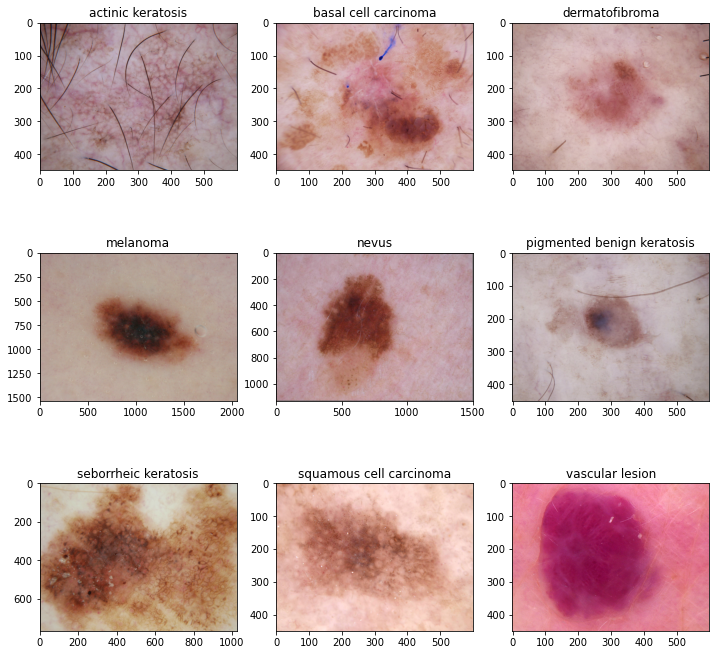

In [8]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img =plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
        plt.title(class_names[i])
        plt.imshow(img)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
# Instantiate the model with keras.sequential and begin with rescaling
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model=Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height,img_width,3))])
# Now add layers to this base model
#First conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu",
                input_shape=(180,180,32)))
#Second conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(88, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropriate optimiser 'adam' and loss function such as SparseCategoricalCrossentropy() since there are 9 classes for model training.

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 88, 32)        0         
                                                                 
 flatten (Flatten)           (None, 247808)            0         
                                                        

### Train the model

In [13]:
# Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 103s 2s/step - loss: 3.1395 - accuracy: 0.2098 - val_loss: 1.9322 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 86s 2s/step - loss: 1.9707 - accuracy: 0.2991 - val_loss: 1.8607 - val_accuracy: 0.3289
Epoch 3/20
56/56 [==============================] - 84s 2s/step - loss: 1.9451 - accuracy: 0.3092 - val_loss: 1.8521 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 85s 2s/step - loss: 1.7075 - accuracy: 0.4118 - val_loss: 1.6915 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 83s 1s/step - loss: 1.6334 - accuracy: 0.4492 - val_loss: 1.7099 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 82s 1s/step - loss: 1.5665 - accuracy: 0.4587 - val_loss: 1.7019 - val_accuracy: 0.4340
Epoch 7/20
56/56 [==============================] - 86s 2s/step - loss: 1.4781 - accuracy: 0.5011 - val_loss: 1.6188 - val_accuracy: 0.4676
Epoch 8/20
56/56 [=

### Visualizing training results

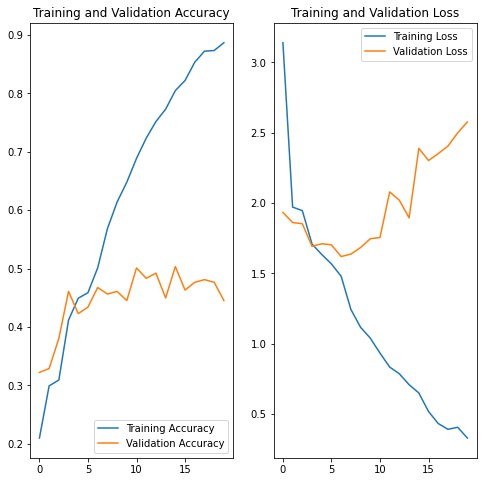

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
- The model has accuracy of ~86% after 20 epochs.
- The model is definitely overfitting because the training accuracy increases and the loss descreases with each epoch, which is not true for the validation dataset as the validation accuracy is almost same (~45%) after 6th epochs and loss is also high in the later part of epochs.

### Write your findings here

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

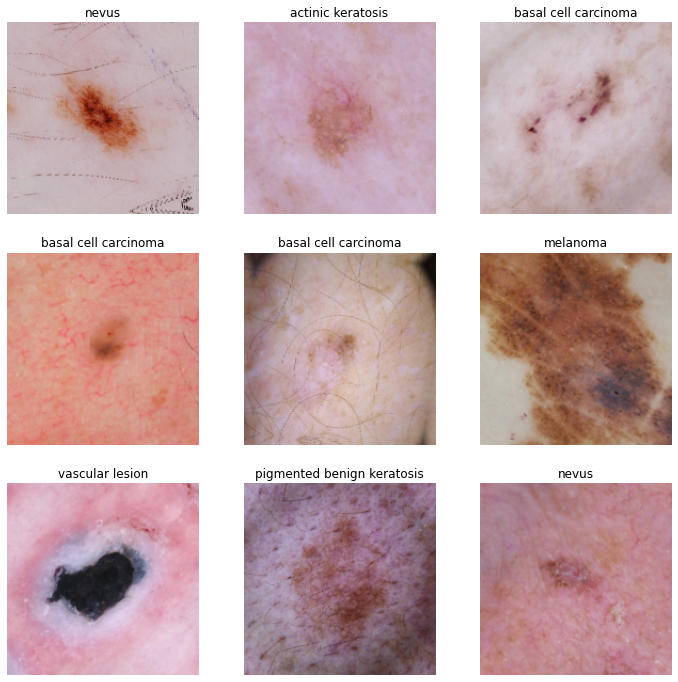

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Instantiate the model with keras.sequential and begin with rescaling
num_classes = 9
model=Sequential([data_augmentation,
                  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height,img_width,3))])
# Now add layers to this base model
#First conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu",
                input_shape=(180,180,32)))
#Second conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(88, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))


### Compiling the model

In [18]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 102s 2s/step - loss: 2.6074 - accuracy: 0.2188 - val_loss: 1.9458 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 104s 2s/step - loss: 1.9444 - accuracy: 0.2874 - val_loss: 1.7760 - val_accuracy: 0.3714
Epoch 3/20
56/56 [==============================] - 104s 2s/step - loss: 1.9366 - accuracy: 0.3198 - val_loss: 1.7495 - val_accuracy: 0.3579
Epoch 4/20
56/56 [==============================] - 106s 2s/step - loss: 1.8832 - accuracy: 0.3404 - val_loss: 1.8524 - val_accuracy: 0.2975
Epoch 5/20
56/56 [==============================] - 103s 2s/step - loss: 1.8004 - accuracy: 0.3739 - val_loss: 1.6940 - val_accuracy: 0.4362
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 1.6902 - accuracy: 0.4169 - val_loss: 1.7046 - val_accuracy: 0.4161
Epoch 7/20
56/56 [==============================] - 103s 2s/step - loss: 1.6493 - accuracy: 0.4124 - val_loss: 1.5520 - val_accuracy: 0.4765
Epoch 8/20
56

### Visualizing the results

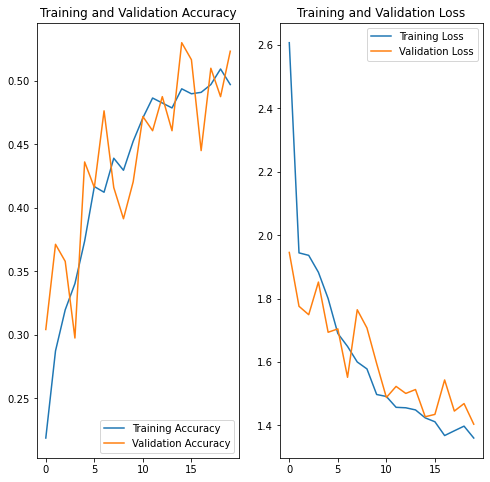

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### findings:
- The model does not seem to overfit or underfit.
- The model's accuracy is definitely reduced.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

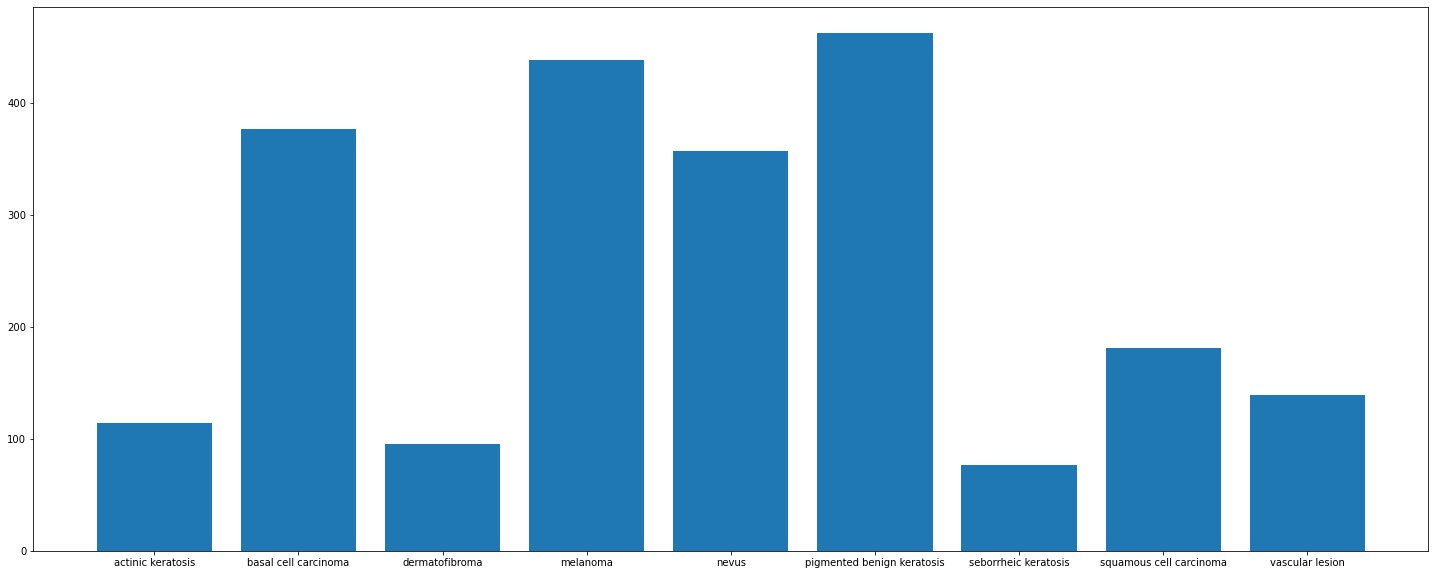

In [22]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### findings: 
#### - Seborrheic Keratosis has the least number of samples.
#### - pigmented benign keratosis class dominate the data in terms proportionate number of samples.


In [29]:
path_list=[x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list=[os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
1,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
2,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
3,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
4,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
...,...,...
2234,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
2235,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
2236,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train
2237,C:\Users\Seema\Desktop\UpGrad\CNN assignment\S...,Train


In [28]:
original_df['Label'].value_counts()

Train    2239
Name: Label, dtype: int64

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2631181A0A0>: 100%|██████████| 500/500 [00:10<00:00, 47.85 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2631185F8E0>: 100%|██████████| 500/500 [00:09<00:00, 55.55 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x263117E6490>: 100%|██████████| 500/500 [00:10<00:00, 47.90 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x263117A7AC0>: 100%|██████████| 500/500 [00:43<00:00, 11.41 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x26300C43B20>: 100%|██████████| 500/500 [00:37<00:00, 13.45 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2630D994640>: 100%|██████████| 500/500 [00:10<00:00, 48.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x263031C68E0>: 100%|██████████| 500/500 [00:18<00:00, 26.57 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x26300D0F1C0>: 100%|██████████| 500/500 [00:08<00:00, 58.14 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x263117F9D30>: 100%|██████████| 500/500 [00:09<00:00, 55.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train_new = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train_new)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [32]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [34]:
new_df['Label'].value_counts()

Train                         2239
actinic keratosis              500
basal cell carcinoma           500
dermatofibroma                 500
melanoma                       500
nevus                          500
pigmented benign keratosis     500
seborrheic keratosis           500
squamous cell carcinoma        500
vascular lesion                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [45]:
data_dir_train="C:/Users/Seema/Desktop/UpGrad/CNN assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)
Adding batchcnormalization() after the first layer

In [50]:
## your code goes here

# Instantiate the model with keras.sequential and begin with rescaling
from tensorflow.keras.layers import BatchNormalization
num_classes = 9
model=Sequential([
                  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height,img_width,3))])
# Now add layers to this base model
#First conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu",
                input_shape=(180,180,32)))
model.add(BatchNormalization())
#Second conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#Add third layer
#Second conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten
model.add(Flatten())
# softmax layer
model.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
    
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 296s 2s/step - loss: 0.4970 - accuracy: 0.8579 - val_loss: 1.2016 - val_accuracy: 0.6288
Epoch 2/30
169/169 [==============================] - 274s 2s/step - loss: 0.4082 - accuracy: 0.8845 - val_loss: 1.7696 - val_accuracy: 0.4788
Epoch 3/30
169/169 [==============================] - 269s 2s/step - loss: 0.3542 - accuracy: 0.9008 - val_loss: 1.6960 - val_accuracy: 0.5189
Epoch 4/30
169/169 [==============================] - 271s 2s/step - loss: 0.2952 - accuracy: 0.9253 - val_loss: 1.9077 - val_accuracy: 0.5100
Epoch 5/30
169/169 [==============================] - 270s 2s/step - loss: 0.2420 - accuracy: 0.9382 - val_loss: 14.8377 - val_accuracy: 0.1952
Epoch 6/30
169/169 [==============================] - 268s 2s/step - loss: 0.2731 - accuracy: 0.9323 - val_loss: 1.7592 - val_accuracy: 0.4818
Epoch 7/30
169/169 [==============================] - 271s 2s/step - loss: 0.2710 - accuracy: 0.9360 - val_loss: 3.1576 - val_accuracy: 0.338

#### **Todo:**  Visualize the model results

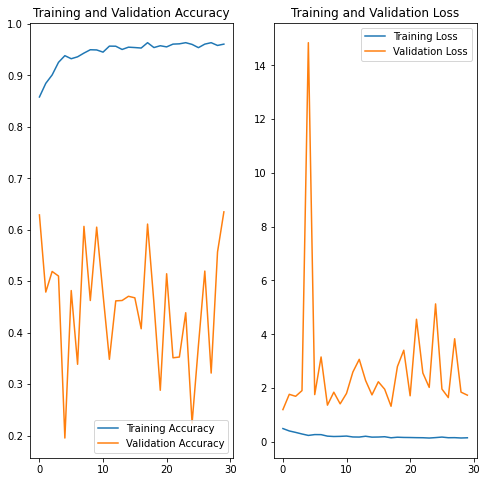

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observation:
- The above model is overfit, since it is showing accuracy of ~96% on the training data but a fluctuating(unstable) accuracy  on the validation data.
- Loss on the validation data is also too high as well as shaky.

### Another model where I have added batch normalization after the second layer.

In [56]:
## your code goes here

# Instantiate the model with keras.sequential and begin with rescaling
#from tensorflow.keras.layers import BatchNormalization
num_classes = 9
model1=Sequential([
                  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height,img_width,3))])
# Now add layers to this base model
#First conv layer
model1.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu",
                input_shape=(180,180,32)))
#model.add(BatchNormalization())
#Second conv layer
model1.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

#Add third layer
#Second conv layer
model1.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation="relu"))
#model.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# flatten
model1.add(Flatten())
# softmax layer
model1.add(Dense(num_classes, activation='softmax'))

In [57]:
## your code goes here
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [58]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 354s 2s/step - loss: 1.7462 - accuracy: 0.4162 - val_loss: 2.2115 - val_accuracy: 0.1522
Epoch 2/20
169/169 [==============================] - 358s 2s/step - loss: 1.0429 - accuracy: 0.6445 - val_loss: 2.0390 - val_accuracy: 0.3140
Epoch 3/20
169/169 [==============================] - 373s 2s/step - loss: 0.7265 - accuracy: 0.7708 - val_loss: 1.7826 - val_accuracy: 0.3756
Epoch 4/20
169/169 [==============================] - 362s 2s/step - loss: 0.5312 - accuracy: 0.8513 - val_loss: 1.6540 - val_accuracy: 0.4566
Epoch 5/20
169/169 [==============================] - 346s 2s/step - loss: 0.3785 - accuracy: 0.9000 - val_loss: 1.4160 - val_accuracy: 0.5872
Epoch 6/20
169/169 [==============================] - 279s 2s/step - loss: 0.3911 - accuracy: 0.9078 - val_loss: 2.8527 - val_accuracy: 0.4269
Epoch 7/20
169/169 [==============================] - 267s 2s/step - loss: 0.3213 - accuracy: 0.9216 - val_loss: 2.0196 - val_accuracy: 0.5427

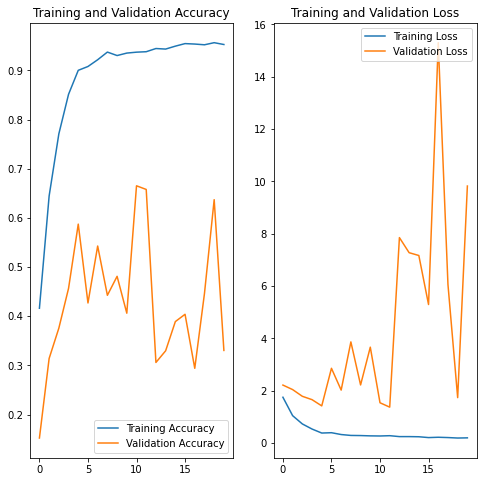

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observation:
- There is not much change in moving the batchnormalization() after the second layer.
- Th model is also overfit, since it is showing accuracy of ~96% on the training data but a fluctuating(unstable) accuracy  on the validation data.
- Loss on the validation data is also too high as well as shaky.

### Another model where I have added batch normalization after the second layer and changes the filter size to (5,5) on all the three hidden layers.

In [64]:
num_classes = 9
model2=Sequential([
                  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height,img_width,3))])
# Now add layers to this base model
#First conv layer
model2.add(Conv2D(filters=32,
                kernel_size=(5,5),
                activation="relu",
                input_shape=(180,180,32)))
#model.add(BatchNormalization())
#Second conv layer
model2.add(Conv2D(filters=32,
                kernel_size=(5,5),
                activation="relu"))
model1.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

#Add third layer
#Second conv layer
model2.add(Conv2D(filters=32,
                kernel_size=(5,5),
                activation="relu"))
#model.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# flatten
model2.add(Flatten())
# softmax layer
model2.add(Dense(num_classes, activation='softmax'))

In [65]:
## your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs = 20
## Your code goes here, use 50 epochs.
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 711s 4s/step - loss: 2.1787 - accuracy: 0.1643 - val_loss: 2.1928 - val_accuracy: 0.1418
Epoch 2/20
169/169 [==============================] - 710s 4s/step - loss: 2.0828 - accuracy: 0.2014 - val_loss: 2.0431 - val_accuracy: 0.2160
Epoch 3/20
169/169 [==============================] - 670s 4s/step - loss: 1.9430 - accuracy: 0.2786 - val_loss: 1.9308 - val_accuracy: 0.2710
Epoch 4/20
169/169 [==============================] - 686s 4s/step - loss: 1.8875 - accuracy: 0.3064 - val_loss: 1.8612 - val_accuracy: 0.2999
Epoch 5/20
169/169 [==============================] - 601s 4s/step - loss: 1.8018 - accuracy: 0.3361 - val_loss: 1.7833 - val_accuracy: 0.3385
Epoch 6/20
169/169 [==============================] - 590s 3s/step - loss: 1.7315 - accuracy: 0.3678 - val_loss: 1.6970 - val_accuracy: 0.3764
Epoch 7/20
169/169 [==============================] - 583s 3s/step - loss: 1.6660 - accuracy: 0.3930 - val_loss: 1.7777 - val_accuracy: 0.3749

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Class rebalance has defintely improved the training accuracy but not validation accuracy on the two models: model and model1..
- The two model generated after the class balance show the similar characterstics.
- In model2, Changing the filter size to (5,5) with batch normalization after the second hidden layer has shown a steady improvement on accuracy of both training and validation dataset and slow reduction in the loss on both datasets.
- The model can show better results by hypertuning the parameters.
- All the above code ran on my local machine, as with google colab had no access to free GPUs and on the local system it is taking too long to train the model.